In [2]:
import tensorflow as tf

In [3]:
# We need to get the fashion mnist dataset from keras datasets
from tensorflow.keras.datasets import fashion_mnist

In [4]:
# call the load_data() function in order to download the dataset
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [5]:
# 60000 images, where each image is 28 x 28 pixels
train_data.shape

(60000, 28, 28)

In [6]:
import matplotlib.pyplot as plt

In [7]:
# These are all the class names from fashion mnist data
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress',
               'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag',
               'Ankle boot']

In [9]:
import random

In [13]:
import pandas as pd

In [16]:
# Normalize the data so that each pixel is between the value of 0 and 1
train_data_norm = train_data / 255.0
test_data_norm = test_data / 255.0

In [17]:
# As we can see the min and max values are now 0 and 1 respectively
train_data_norm.max(), train_data_norm.min()

(1.0, 0.0)

In [18]:
# Create the model with two hidden layers where the first hidden layer has 4
# neurons and the second hidden layer has 2 neurons, note that the output
# layer has 10 neurons because we have 10 items in our dataset (refer to the
# class names). Since the problem is multi class i.e. more 2 item to predict
# from that is why we have used "softmax" as our activation function
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation='selu'),
    tf.keras.layers.Dense(2, activation='selu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# We need to compile the model. Here we use categorical cross
# entropy because the problem is categorical and not binary since
# there are more than 2 classes in our dataset. For the optimizer, we 
# will use the good ol' Adam
model.compile(
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

In [19]:
# Fit the model and save the curves in history variable
history = model.fit(train_data_norm, train_labels,
                    epochs=10, validation_data=(test_data_norm, test_labels))

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.4343 - accuracy: 0.4953 - val_loss: 1.1353 - val_accuracy: 0.5935
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.0570 - accuracy: 0.6472 - val_loss: 1.0133 - val_accuracy: 0.6703
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.9734 - accuracy: 0.6829 - val_loss: 0.9638 - val_accuracy: 0.6905
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.9260 - accuracy: 0.6991 - val_loss: 0.9290 - val_accuracy: 0.6983
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.8871 - accuracy: 0.7140 - val_loss: 0.9366 - val_accuracy: 0.6964
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.8526 - accuracy: 0.7248 - val_loss: 0.8775 - val_accuracy: 0.7176
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.8212 - accuracy: 0.7358 - val_loss: 0.8513 - val_accuracy:

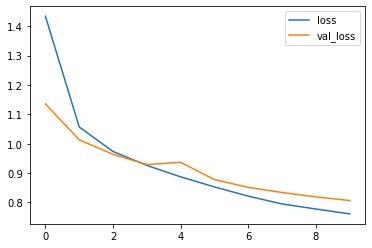

In [20]:
# As we can see, the loss and validation loss started to decrease as
# our model progressed but at some point the validation loss curve
# starts to go higher which indicates overfitting i.e. our model
# is trying to memorize the train data and will not perform well
# on newly unseen data
pd.DataFrame(history.history)[['loss', 'val_loss']].plot()

In [21]:
# Get predictions from our model
predictions = (model.predict(test_data_norm) > 0.5).astype('int32')

In [22]:
class_names[predictions[0].argmax()]

'Ankle boot'

In [23]:
len(predictions)

10000

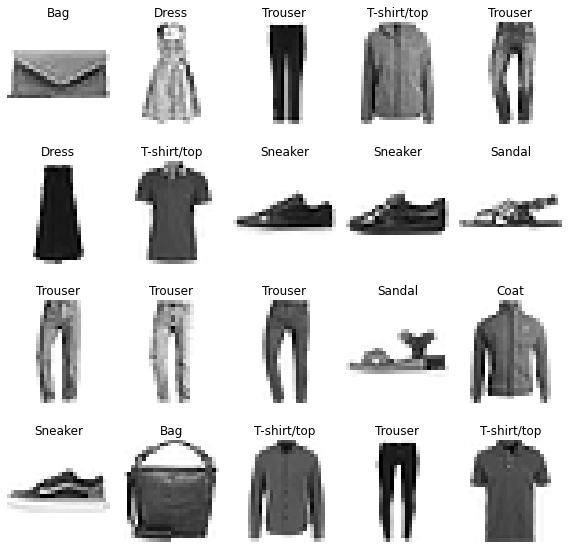

In [24]:
# Randomly plot out 20 images and also what the
# model predicted it to be.

plt.figure(figsize=(8, 8))

for i in range(20):
  ax = plt.subplot(4, 5, i + 1)
  rand_index = random.choice(range(len(predictions)))
  plt.imshow(test_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[predictions[rand_index].argmax()])
  plt.axis(False)

plt.tight_layout()